### Global Corruption Analysis: Correlations with Purchasing Power and Regional Distribution
#### Introduction
The project correlates corruption index across 71 countries with the power purchase index, giving detailed analysis of corruption by geographical regions and exploring relative corruption levels. The data were imported from two data frames, 'cost_living' and 'corruption', and merged into a single data frame 'cost_corruption', to facilitate comprehensive analysis.

In [132]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing files 'cost_living' and 'corruption' 
#Merging in one Data Frame 'cost_corruption'
cost_living = pd.read_csv(r'C:\Users\acker\Downloads\World Economic Data\cost_of_living.csv')
corruption = pd.read_csv(r'C:\Users\acker\Downloads\World Economic Data\corruption.csv')
cost_corruption = pd.merge(cost_living, corruption, on='country', how='inner')

#Creating a new column 'regions' for segregating countries in respective region
#List of regions
geographical_regions = ['europe', 'asia', 'north_america', 'south_america', 'africa', 'oceania', 'middle_east']

#Listing the countries in each region
europe= ["Denmark", "Finland", "Norway", "Sweden", "Switzerland", "Netherlands", "Luxembourg", "Germany", "United Kingdom", "Austria", "Estonia", "Iceland", "Ireland", "Belgium", "France", "Portugal", "Spain", "Italy", "Poland", "Greece", "Romania"]
asia= ["Singapore", "Hong Kong", "Japan", "United Arab Emirates", "Qatar", "South Korea", "Israel", "Malaysia", "China", "Vietnam", "Indonesia", "Turkey", "Sri Lanka", "Thailand", "Philippines", "Azerbaijan", "Djibouti", "Iran", "Lebanon", "Cambodia", "Kyrgyzstan", "Bangladesh", "Tajikistan", "Laos", "Myanmar", "Nepal", "Pakistan", "Uzbekistan", "Central Africa", "Afghanistan", "Yemen", "Syria"]
north_america= ["United States", "Canada", "Mexico", "El Salvador", "Dominican Republic", "Guatemala", "Honduras", "Nicaragua"]
south_america= ["Argentina", "Brazil", "Ecuador", "Paraguay"]
africa= ["South Africa", "Sierra Leone", "Zambia", "Eswatini", "Algeria", "Egypt", "Liberia", "Mauritania", "Cameroon", "Uganda", "Madagascar", "Mozambique", "Guinea", "Burundi", "Congo", "Niger", "Cape Verde", "Libya", "Somalia", "South Sudan", "Nigeria", "Comoros", "Sudan", "Equatorial Guinea", "Zimbabwe", "Gabon", "Angola", "Chad", "Congo (Dem. Republic)", "Mali", "Eritrea"]
oceania= ["New Zealand", "Australia", "Papua New Guinea"]
middle_east= ["United Arab Emirates", "Qatar", "Saudi Arabia", "Iran", "Lebanon", "Iraq", "Yemen", "Syria"]

#Conditioning the the column 'country' in each region created
conditions = [
    cost_corruption["country"].isin(europe),
    cost_corruption["country"].isin(asia),
    cost_corruption["country"].isin(north_america),
    cost_corruption["country"].isin(south_america),
    cost_corruption["country"].isin(africa),
    cost_corruption["country"].isin(oceania),
    cost_corruption["country"].isin(middle_east)
]

#Adding the new column 'regions' into our Data Frame
cost_corruption['regions'] = np.select(conditions, geographical_regions, default='unknown')

#Putting all in order
ordem_df = ['country', 'regions', 'cost_index', 'monthly_income', 'purchasing_power_index', 'annual_income', 'corruption_index']
cost_corruption = cost_corruption[ordem_df]
print(cost_corruption.head())

       country regions  cost_index  monthly_income  purchasing_power_index  \
0  Switzerland  europe       142.4            7530                    90.1   
1       Israel    asia       130.2            4130                    54.1   
2      Iceland  europe       128.0            5368                    71.5   
3       Norway  europe       124.6            7008                    95.9   
4      Denmark  europe       119.9            5676                    80.6   

   annual_income  corruption_index  
0          90360                16  
1          49560                41  
2          64410                26  
3          84090                15  
4          68110                12  


#### Exploration

In [133]:
#Checking missing data 
print(cost_corruption.isna().sum())

country                   0
regions                   0
cost_index                0
monthly_income            0
purchasing_power_index    0
annual_income             0
corruption_index          0
dtype: int64


In [134]:
#Data type
print(cost_corruption.dtypes)

country                    object
regions                    object
cost_index                float64
monthly_income              int64
purchasing_power_index    float64
annual_income               int64
corruption_index            int64
dtype: object


In [135]:
#Statistical description
print(cost_corruption.describe())

       cost_index  monthly_income  purchasing_power_index  annual_income  \
count   71.000000       71.000000               71.000000      71.000000   
mean    64.730986     2098.859155               41.915493   25185.352113   
std     34.060692     2188.744313               32.543486   26264.704988   
min     22.800000       87.000000                3.400000    1040.000000   
25%     36.000000      287.000000               12.900000    3440.000000   
50%     51.900000      911.000000               38.300000   10930.000000   
75%     96.050000     4078.000000               69.450000   48935.000000   
max    142.400000     7530.000000              121.100000   90360.000000   

       corruption_index  
count         71.000000  
mean          50.014085  
std           22.369298  
min           12.000000  
25%           27.000000  
50%           56.000000  
75%           70.000000  
max           83.000000  


The dataset includes 71 unique contries. There are no missing values and the data have already been converted to the ideal type.

#### Correlation

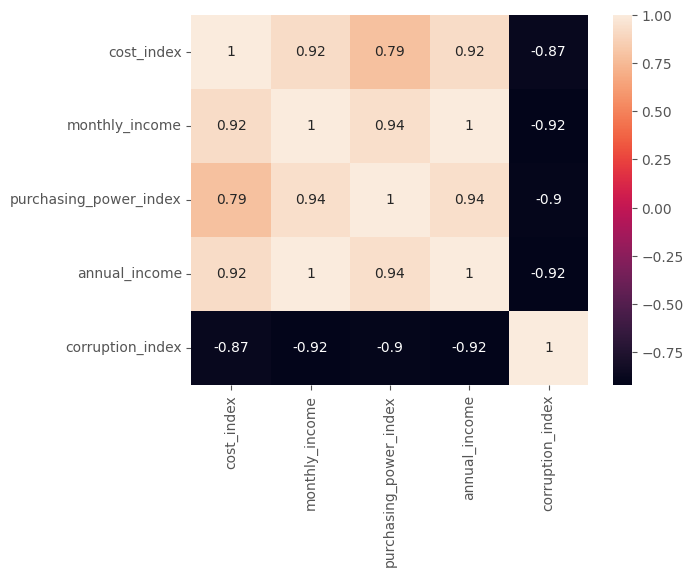

In [136]:
#A heatmap for checking correlations between the data frame columns
plt.style.use('ggplot')
sns.set_palette('RdBu')
numeric_cols = cost_corruption.select_dtypes(include=['number']).columns
sns.heatmap(cost_corruption[numeric_cols].corr(), annot=True)
plt.show()

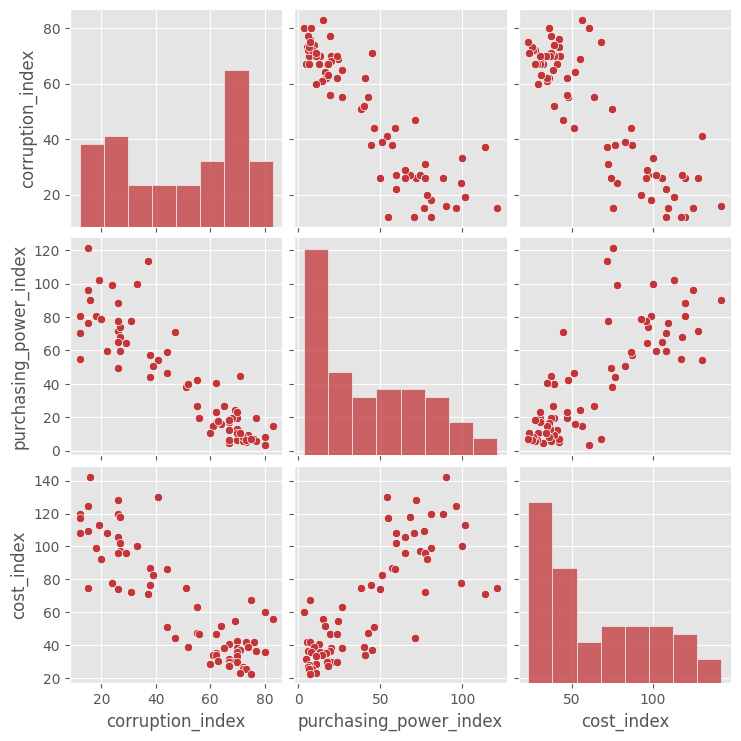

In [137]:
#interesting correlations
sns.pairplot(data=cost_corruption, vars=['corruption_index', 'purchasing_power_index', 'cost_index'])
plt.show()

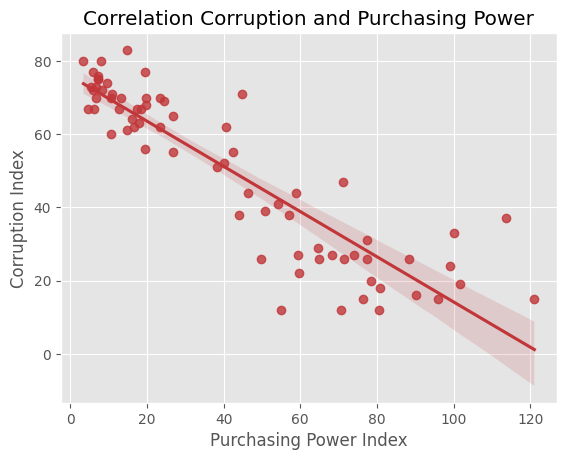

In [138]:
#Looking into the 'purchasing_power_index' x 'corruption_index'
sns.regplot(data=cost_corruption, x='purchasing_power_index', y='corruption_index')
plt.title('Correlation Corruption and Purchasing Power')
plt.xlabel('Purchasing Power Index')
plt.ylabel('Corruption Index')
plt.show()

The higher the purchasing power, the lower the corruption index.

#### Questions
Which country has the highest corruption index? Which one has the lowest?

In [139]:
#Finding out the countries with higher and lower corruption index
max_corruption = cost_corruption['corruption_index'].max()
max_corrupted_country = cost_corruption[cost_corruption['corruption_index'] == max_corruption]['country'].values[0]
print('The country with highest corruption index is ' + str(max_corrupted_country))

min_corruption = cost_corruption['corruption_index'].min()
less_corrupted_country = cost_corruption[cost_corruption['corruption_index'] == min_corruption]['country'].values[0]
print('The country with lowest corruption index is ' + str(less_corrupted_country))

The country with highest corruption index is Equatorial Guinea
The country with lowest corruption index is Denmark


Which region has the most scattered corruption data?
What is the standart deviation for each region?

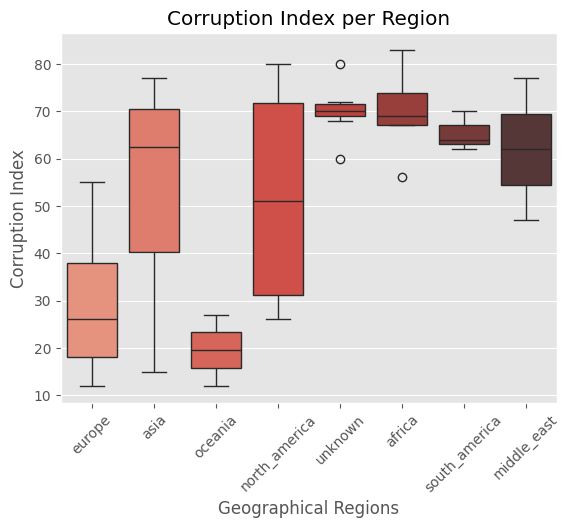

In [140]:
#looking into a boxplot per geographical regions
sns.boxplot(data=cost_corruption, x='regions', y='corruption_index', hue='regions', palette="Reds_d")
plt.xticks(rotation=45)
plt.title('Corruption Index per Region')
plt.ylabel('Corruption Index')
plt.xlabel('Geographical Regions')
plt.show()

In [141]:
#Standart deviation of 'corruption_index' by region
cost_corruption.groupby('regions')['corruption_index'].std().round(2)

regions
africa            7.91
asia             18.64
europe           12.81
middle_east      21.21
north_america    26.52
oceania          10.61
south_america     4.16
unknown           5.90
Name: corruption_index, dtype: float64

The standart deviation and the boxplot depicts a highly dispersed data in North America.

#### Relative corruption level
This time we will look into four levels of corruption by creating a new column 'corruption_level'. 

In [142]:
#Subsetting in in quantiles
corruption_level = ['low', 'median', 'high', 'very high']

twenty_fifth = cost_corruption['corruption_index'].quantile(0.25)
median = cost_corruption['corruption_index'].median()
seventy_fifth = cost_corruption['corruption_index'].quantile(0.75)

conditions = [
    (cost_corruption['corruption_index'] <= twenty_fifth),  # low
    (cost_corruption['corruption_index'] > twenty_fifth) & (cost_corruption['corruption_index'] <= median),  # median
    (cost_corruption['corruption_index'] > median) & (cost_corruption['corruption_index'] <= seventy_fifth),  # high
    (cost_corruption['corruption_index'] > seventy_fifth)  # very high
]

cost_corruption['corruption_level'] = np.select(conditions, corruption_level, default='unknown')
print(cost_corruption.head())

       country regions  cost_index  monthly_income  purchasing_power_index  \
0  Switzerland  europe       142.4            7530                    90.1   
1       Israel    asia       130.2            4130                    54.1   
2      Iceland  europe       128.0            5368                    71.5   
3       Norway  europe       124.6            7008                    95.9   
4      Denmark  europe       119.9            5676                    80.6   

   annual_income  corruption_index corruption_level  
0          90360                16              low  
1          49560                41           median  
2          64410                26              low  
3          84090                15              low  
4          68110                12              low  


#### Zooming out

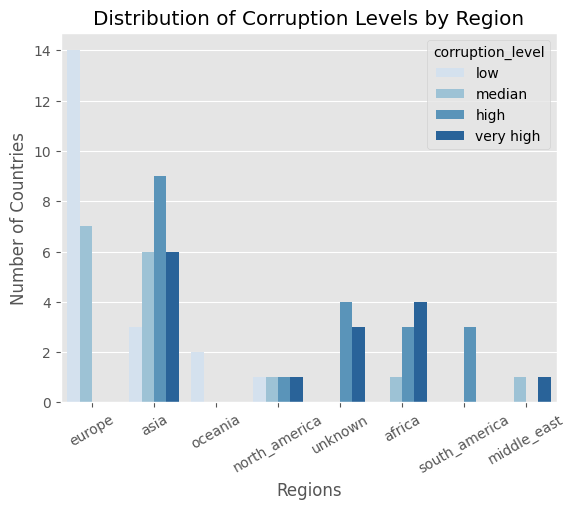

In [143]:
#Showing countplot per 'regions' and 'corruption_level'
sns.countplot(data=cost_corruption, x='regions', hue='corruption_level', hue_order=['low', 'median', 'high', 'very high'], palette="Blues")
plt.xticks(rotation=30)
plt.title('Distribution of Corruption Levels by Region')
plt.xlabel('Regions')
plt.ylabel('Number of Countries')
plt.show()

The data shows that 'europe' only has countries with a low and median 'corruption_level'. In the other hand, 'asia' and 'south_america' have a high 'corruption_level' in the majority of their countries. 'africa' has the majority of its countries in the very high 'corruption_level'.

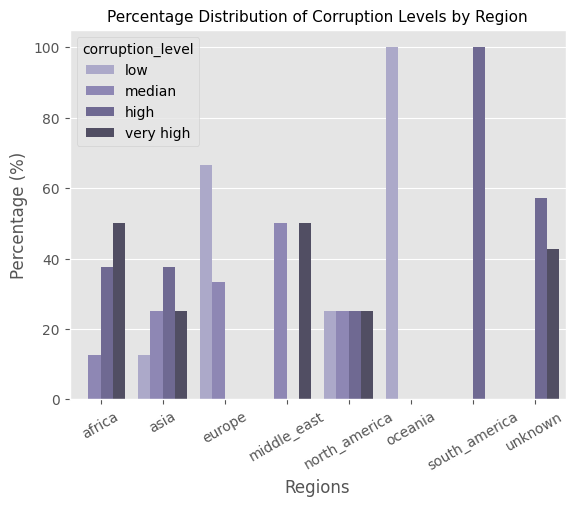

In [144]:
#In percentage
total_region = cost_corruption.groupby('regions').size().reset_index(name='total')
total_region_level = cost_corruption.groupby(['regions', 'corruption_level']).size().reset_index(name='count_level_region')
percentage_data = pd.merge(total_region, total_region_level, on='regions')
percentage_data['percentage'] = (percentage_data['count_level_region'] / percentage_data['total']) * 100

def fun(data, x, y, title, title_fontsize, xticks_rotation, xlabel, ylabel, hue, hue_order, palette):
    sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, palette=palette)
    plt.title(title, fontsize=title_fontsize)
    plt.xticks(rotation=xticks_rotation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
g= fun(percentage_data, 'regions', 'percentage', 'Percentage Distribution of Corruption Levels by Region', 11, 30, 'Regions', 'Percentage (%)', 'corruption_level', ['low', 'median', 'high', 'very high'], 'Purples_d')
plt.show(g)

The barplot shows a proportional predominance of a high 'corruption_level' in 'south_america' and a predominance of a low 'corruption_level' in 'oceania'.

#### Conclusion
This analysis revealed a negative correlation between purchasing power and corruption, with wealthier countries generally exhibiting lower corruption levels. Regional trends showed significant disparities, with South America and Africa having higher corruption levels, while Europe and Oceania demonstrated lower levels. The study highlights the importance of economic stability in combating corruption and provides valuable insights for policymakers aiming to address corruption on a global scale.